In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_data_file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# GENERATE CITIES LIST

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

620

In [4]:
# LISTS TO POPULATE
city = []
country = []
latitude =[]
longitude = []
temperature = []
wind_speed = []
cloud_cover = []
humidity = []
wind_speed = []
date = []

In [5]:
# PERFORM API CALLS

# Open API Key
api_key = weather_api_key()

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Set up a for loop to pull data
counter = 0
for cityname in cities:
    try:
        
        response = requests.get(f"{url}&q={cityname}").json()
        city.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        cloud_cover.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])  
        date.append(response["dt"])
        
        counter = counter + 1
        
        print(f"cityname {counter} | {cityname}")
        
        time.sleep(1.05)
    except:
        
        print(f"City not found. Skipping... {cityname}")
        
    continue
print("--------------------\nData Retrieval Complete\n--------------------")


cityname 1 | busselton
cityname 2 | avarua
cityname 3 | puerto ayora
cityname 4 | saldanha
cityname 5 | puerto escondido
City not found. Skipping... belushya guba
cityname 6 | skibbereen
cityname 7 | flinders
cityname 8 | broome
cityname 9 | punta arenas
cityname 10 | bluff
cityname 11 | jumla
cityname 12 | nikolskoye
cityname 13 | kisangani
cityname 14 | guerrero negro
cityname 15 | rikitea
cityname 16 | thompson
cityname 17 | mataura
City not found. Skipping... tumannyy
cityname 18 | hobart
cityname 19 | dharchula
cityname 20 | husavik
cityname 21 | padang
cityname 22 | wasilla
cityname 23 | port hawkesbury
cityname 24 | jasper
cityname 25 | putat
cityname 26 | komsomolskiy
cityname 27 | cape town
cityname 28 | deputatskiy
cityname 29 | ushuaia
cityname 30 | marsa
cityname 31 | atuona
cityname 32 | gilbues
cityname 33 | saskylakh
cityname 34 | hasaki
cityname 35 | cabo san lucas
cityname 36 | constitucion
cityname 37 | mongo
cityname 38 | provideniya
cityname 39 | arraial do cabo
cit

cityname 301 | richards bay
cityname 302 | faya
cityname 303 | paamiut
cityname 304 | puerto quijarro
cityname 305 | sisimiut
cityname 306 | porto velho
cityname 307 | lavrentiya
cityname 308 | martapura
cityname 309 | matara
cityname 310 | san jose de rio tinto
cityname 311 | belle fourche
cityname 312 | umea
cityname 313 | te anau
cityname 314 | basoko
cityname 315 | imeni poliny osipenko
cityname 316 | kholtoson
cityname 317 | lujan
cityname 318 | tonj
cityname 319 | venado
cityname 320 | okha
cityname 321 | kralendijk
cityname 322 | neiafu
cityname 323 | mahebourg
cityname 324 | barra patuca
cityname 325 | unecha
cityname 326 | bethel
cityname 327 | vao
cityname 328 | ozernovskiy
cityname 329 | shelburne
cityname 330 | waingapu
cityname 331 | tiksi
City not found. Skipping... yingshang
cityname 332 | awjilah
cityname 333 | vuktyl
cityname 334 | tambo
City not found. Skipping... viligili
City not found. Skipping... yomitan
cityname 335 | woodward
cityname 336 | tuktoyaktuk
cityname 

In [6]:
# CONVERT RAW DATA TO DATAFRAME
weather_df = pd.DataFrame({"City": city, "Country": country, "Latitude": latitude, "Longitude": longitude, 
                           "Temperature": temperature, "Cloud Cover": cloud_cover, "Humidity": humidity, 
                           "Wind Speed": wind_speed, "Date": date})
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Cloud Cover,Humidity,Wind Speed,Date
0,Busselton,AU,-33.65,115.33,73.8,42,61,5.99,1607641825
1,Avarua,CK,-21.21,-159.78,84.2,5,74,20.80,1607641910
2,Puerto Ayora,EC,-0.74,-90.35,76.5,20,61,12.75,1607642044
3,Saldanha,ZA,-33.01,17.94,60.8,98,77,3.36,1607642045
4,Puerto Escondido,MX,15.85,-97.07,82.4,75,69,3.36,1607642047


In [7]:
# INSPECT THE DATA AND REMOVE THE CITIES WHERE HUMIDITY IS > 100%
low_humidity = weather_df[weather_df["Humidity"]<=100]
low_humidity.describe()        

high_humidity = weather_df.index[weather_df["Humidity"]>100].tolist()

print(f"There are {len(high_humidity)} cities with greater than 100% humidity.")

There are 0 cities with greater than 100% humidity.


In [8]:
import datetime
date = datetime.date.today()

In [9]:
# Create a new DataFrame equal to the city data to drop all humidity outliers.
clean_city_data = weather_df.drop(labels=high_humidity, inplace=False)
clean_city_data.head()

,City,Country,Latitude,Longitude,Temperature,Cloud Cover,Humidity,Wind Speed,Date
0,Busselton,AU,-33.65,115.33,73.8,42,61,5.99,1607641825
1,Avarua,CK,-21.21,-159.78,84.2,5,74,20.80,1607641910
2,Puerto Ayora,EC,-0.74,-90.35,76.5,20,61,12.75,1607642044
3,Saldanha,ZA,-33.01,17.94,60.8,98,77,3.36,1607642045
4,Puerto Escondido,MX,15.85,-97.07,82.4,75,69,3.36,1607642047


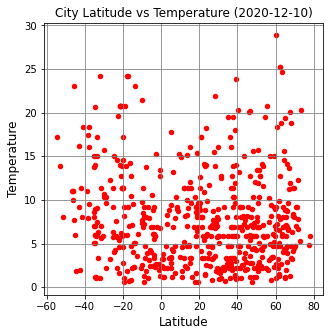

After latitude of 0, temperature and Latitude appear to be inversely related.
Therefore, for the included cities above latitude of 0, as latitude increases, temperature decreases.


In [25]:
# PLOT THE DATA (1/4)
# Temperature (F) vs. Latitude

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')

marker_size=20
axis = plt.scatter(x=latitude, y=wind_speed, color='red', s=20)
plt.title(f'City Latitude vs Temperature ({date})', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Temperature', fontsize=12)

plt.savefig('lat_vs_temp.png')

plt.show()

print(f"After latitude of 0, temperature and Latitude appear to be inversely related.")
print(f"Therefore, for the included cities above latitude of 0, as latitude increases, temperature decreases.")

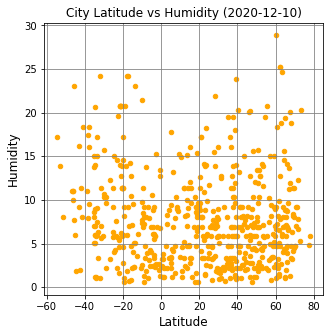

Humidity is weakly correlated to latitude.


In [27]:
# PLOT THE DATA (2/4)
# Humidity (%) vs. Latitude

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')

marker_size=20
axis = plt.scatter(x=latitude, y=wind_speed, color='orange', s=20)
plt.title(f'City Latitude vs Humidity ({date})', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)

plt.savefig('lat_vs_humidity.png')

plt.show()

print(f"Humidity is weakly correlated to latitude.")

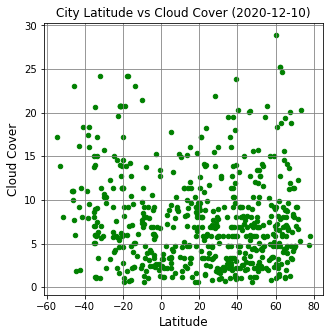

Cloud cover is also weakly correlated to latitude.


In [30]:
# PLOT THE DATA (3/4)
# Cloudiness (%) vs. Latitude

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')

marker_size=20
axis = plt.scatter(x=latitude, y=wind_speed, color='green', s=20)
plt.title(f'City Latitude vs Cloud Cover ({date})', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloud Cover', fontsize=12)
plt.savefig('lat_vs_cloudiness.png')

plt.show()

print(f"Cloud cover is also weakly correlated to latitude.")

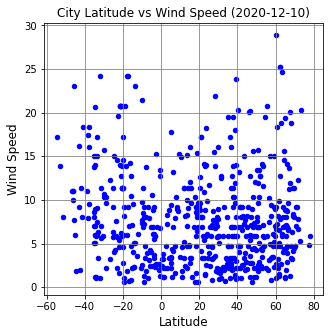

Wind speed appears to be higher above the equator.


In [31]:
# PLOT THE DATA (4/4)
# Wind Speed (mph) vs. Latitude

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')

marker_size=20
axis = plt.scatter(x=latitude, y=wind_speed, color='blue', s=20)
plt.title(f'City Latitude vs Wind Speed ({date})', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)

plt.savefig('lat_vs_wind.png')

plt.show()

print(f"Wind speed appears to be higher above the equator." )

In [32]:
# EXPORT TO CSV
weather_df.to_csv(output_data_file)
weather_df.count()
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Cloud Cover,Humidity,Wind Speed,Date
0,Busselton,AU,-33.65,115.33,73.8,42,61,5.99,1607641825
1,Avarua,CK,-21.21,-159.78,84.2,5,74,20.80,1607641910
2,Puerto Ayora,EC,-0.74,-90.35,76.5,20,61,12.75,1607642044
3,Saldanha,ZA,-33.01,17.94,60.8,98,77,3.36,1607642045
4,Puerto Escondido,MX,15.85,-97.07,82.4,75,69,3.36,1607642047


In [33]:
# LINEAR REGRESSION (Separate Northern and Southern Hermispheres)

northern_df = clean_city_data[clean_city_data["Latitude"]>0]
southern_df = clean_city_data[clean_city_data["Latitude"]<0]

y = -1.28x +92.53
The r-squared value is: 0.7074845445786134
There is a negative correlation latitude and temperature in the northern hemisphere.


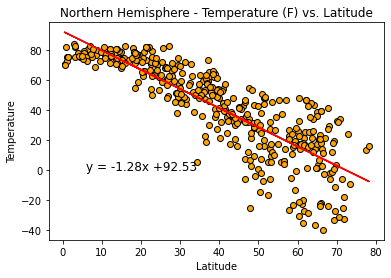

In [48]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="orange",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")

print(f"The r-squared value is: {rvalue**2}")
print(f"There is a negative correlation latitude and temperature in the northern hemisphere.")
plt.show()

y = 0.44x +81.82
The r-squared value is: 0.31769430880652305
There is a weak positive correlation between temperature and latitude in the southern hemisphere.


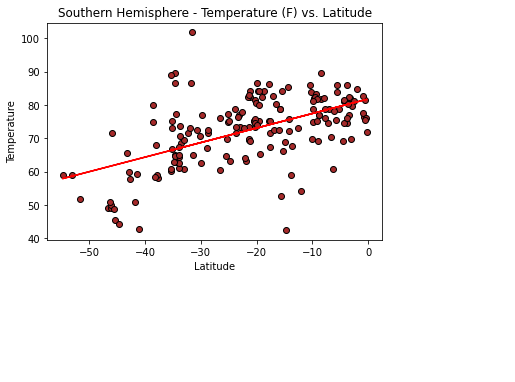

In [49]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="brown",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")

print(f"The r-squared value is: {rvalue**2}")
print(f"There is a weak positive correlation between temperature and latitude in the southern hemisphere.")
plt.show()

In [61]:
print(f"Analysis: ")
print(f"The relationship between latitude and temperature in the northern and southern hemispheres is opposite.")
print(f"This makes sense as temperature tends to be warmer closer to the equator and colder closer to the poles.")

Analysis: 
The relationship between latitude and temperature in the northern and southern hemispheres is opposite.
This makes sense as temperature tends to be warmer closer to the equator and colder closer to the poles.


y = 0.37x +60.26
The r-squared value is: 0.12362563953813852
There is a very weak relationship between latitude and humidity in the northern hemisphere.


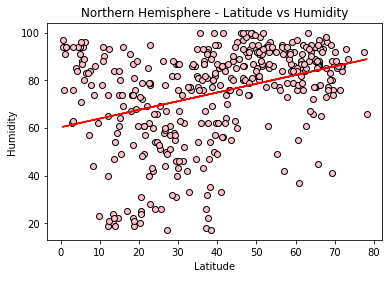

In [51]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="pink",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Latitude vs Humidity")

print(f"The r-squared value is: {rvalue**2}")
print(f"There is a very weak relationship between latitude and humidity in the northern hemisphere.")
plt.show()

y = 0.36x +79.33
The r-squared value is: 0.06525694693267342
There is also a weakly positive relationship between latitude and humidity in the southern hemisphere.


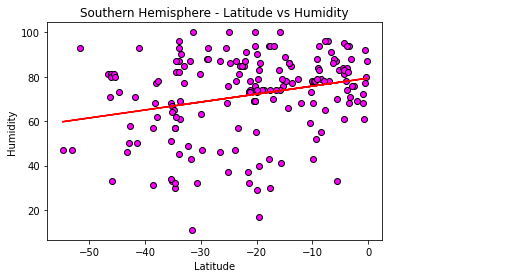

In [52]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="magenta",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Latitude vs Humidity")

print(f"The r-squared value is: {rvalue**2}")
print(f"There is also a weakly positive relationship between latitude and humidity in the southern hemisphere.")
plt.show()

In [64]:
print(f"Analysis: ")
print(f"Generally, humidity has a weak correlation with latitude, but tends to be higher at northern latitudes.")
print(f"This may be due to the fact that higher temperatures cause more evaporation.")

Analysis: 
Generally, humidity has a weak correlation with latitude, but tends to be higher at northern latitudes.
This may be due to the fact that higher temperatures cause more evaporation.


y = 0.51x +29.77
The r-squared value is: 0.06337578110295988
Cloud cover is concentrated at both ends of the cloudiness spectrum.
There is a very weak correlation between latitude and cloudiness in the northern hemisphere.


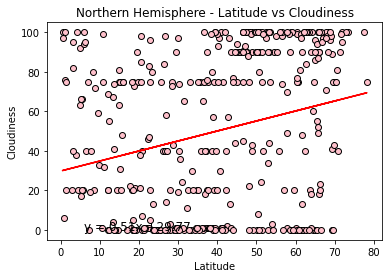

In [54]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_df["Latitude"]
y_values = northern_df["Cloud Cover"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="pink",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Latitude vs Cloudiness")

print(f"The r-squared value is: {rvalue**2}")
print(f"Cloud cover is concentrated at both ends of the cloudiness spectrum.")
print(f"There is a very weak correlation between latitude and cloudiness in the northern hemisphere.")
plt.show()

y = 0.27x +62.4
The r-squared value is: 0.010689421849295416
There is a weak correlation between latitude and cloudiness in the southern hemisphere.


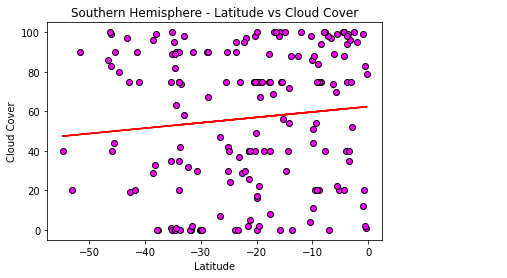

In [55]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_df["Latitude"]
y_values = southern_df["Cloud Cover"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="magenta",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.title("Southern Hemisphere - Latitude vs Cloud Cover")

print(f"The r-squared value is: {rvalue**2}")
print(f"There is a weak correlation between latitude and cloudiness in the southern hemisphere.")
plt.show()

In [65]:
print(f"In both the northern and southern hemispheres, there is a weak correlation between latitude and cloudiness.")
print(f"However, there appears to be more cloudiness closer to the equator.")
print(f"Because there is an increase in water vapor there is more condensation.")

In both the northern and southern hemispheres, there is a weak correlation between latitude and cloudiness.
However, there appears to be more cloudiness closer to the equator.
Because there is an increase in water vapor there is more condensation.


y = 0.03x +6.23
The r-squared value is: 0.01064937207176244
Wind speed appears to be low at all latitudes in the northern hemisphere.


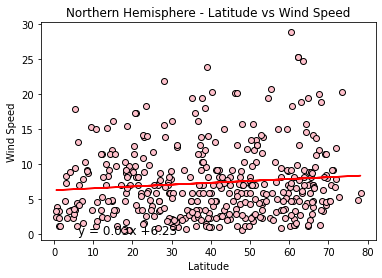

In [58]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="pink",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")

print(f"The r-squared value is: {rvalue**2}")
print(f"Wind speed appears to be low at all latitudes in the northern hemisphere.")
plt.show()

y = -0.12x +6.16
The r-squared value is: 0.07032101676376143
There is a weak correlation between latitude and wind speed in the southern hemisphere.


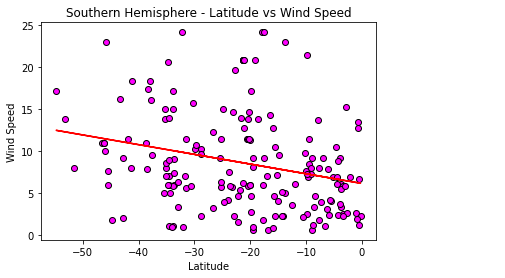

In [59]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,facecolors="magenta",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Latitude vs Wind Speed")

print(f"The r-squared value is: {rvalue**2}")
print(f"There is a weak correlation between latitude and wind speed in the southern hemisphere.")
plt.show()

In [66]:
print(f"Wind speed appears to be highest around the equator and at high latitudes.")
print(f"It appears that latitude does not strongly impact wind speed.")

Wind speed appears to be highest around the equator and at high latitudes.
It appears that latitude does not strongly impact wind speed.
